In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)



begin_surroundings = 198
end_surroundings = 206

#begin_earthquake = 6259313254
begin_earthquake = 6259295000
end_earthquake =   6259320000


In [3]:
time_list_Jacobi = []
dt_array_Jacobi = []
V_array_Jacobi = []
F_array_Jacobi = []
ksp_array_Jacobi = []
rhs_array_Jacobi = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size101__AS_extendedode_BDF5_jacobi-richardson_Stol1e-06__EQ_extendedode_BDF5_jacobi-richardson_Stol1e-06.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_Jacobi.append(time)
            dt_array_Jacobi.append(dt)

            V_array_Jacobi.append(row['Vmax'])
            F_array_Jacobi.append(row['fmax'])
            ksp_array_Jacobi.append(row['KSP_iteration'])
            rhs_array_Jacobi.append(row['count_rhs'])

time_array_Jacobi = np.asarray(time_list_Jacobi, dtype=np.float64)
dt_array_Jacobi = np.asarray(dt_array_Jacobi, dtype=np.float64)
V_array_Jacobi = np.asarray(V_array_Jacobi, dtype=np.float64)
F_array_Jacobi = np.asarray(F_array_Jacobi, dtype=np.float64)
ksp_array_Jacobi = np.asarray(ksp_array_Jacobi, dtype=np.float64)
rhs_array_Jacobi = np.asarray(rhs_array_Jacobi, dtype=np.float64)

time_years_Jacobi = time_array_Jacobi / (365.2425*24*3600)


In [4]:
time_list_JacobiGMRES = []
dt_array_JacobiGMRES = []
V_array_JacobiGMRES = []
F_array_JacobiGMRES = []
ksp_array_JacobiGMRES = []
rhs_array_JacobiGMRES = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size101__AS_extendedode_BDF5_jacobi-gmres_Stol1e-06__EQ_extendedode_BDF5_jacobi-gmres_Stol1e-06.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_JacobiGMRES.append(time)
            dt_array_JacobiGMRES.append(dt)

            V_array_JacobiGMRES.append(row['Vmax'])
            F_array_JacobiGMRES.append(row['fmax'])
            ksp_array_JacobiGMRES.append(row['KSP_iteration'])
            rhs_array_JacobiGMRES.append(row['count_rhs'])

time_array_JacobiGMRES = np.asarray(time_list_JacobiGMRES, dtype=np.float64)
dt_array_JacobiGMRES = np.asarray(dt_array_JacobiGMRES, dtype=np.float64)
V_array_JacobiGMRES = np.asarray(V_array_JacobiGMRES, dtype=np.float64)
F_array_JacobiGMRES = np.asarray(F_array_JacobiGMRES, dtype=np.float64)
ksp_array_JacobiGMRES = np.asarray(ksp_array_JacobiGMRES, dtype=np.float64)
rhs_array_JacobiGMRES = np.asarray(rhs_array_JacobiGMRES, dtype=np.float64)

time_years_JacobiGMRES = time_array_JacobiGMRES / (365.2425*24*3600)


In [5]:
time_list_SORGMRES = []
dt_array_SORGMRES = []
V_array_SORGMRES = []
F_array_SORGMRES = []
ksp_array_SORGMRES = []
rhs_array_SORGMRES = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size101__AS_extendedode_BDF5_sor-gmres_Stol1e-06__EQ_extendedode_BDF5_sor-gmres_Stol1e-06.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_SORGMRES.append(time)
            dt_array_SORGMRES.append(dt)

            V_array_SORGMRES.append(row['Vmax'])
            F_array_SORGMRES.append(row['fmax'])
            ksp_array_SORGMRES.append(row['KSP_iteration'])
            rhs_array_SORGMRES.append(row['count_rhs'])

time_array_SORGMRES = np.asarray(time_list_SORGMRES, dtype=np.float64)
dt_array_SORGMRES = np.asarray(dt_array_SORGMRES, dtype=np.float64)
V_array_SORGMRES = np.asarray(V_array_SORGMRES, dtype=np.float64)
F_array_SORGMRES = np.asarray(F_array_SORGMRES, dtype=np.float64)
ksp_array_SORGMRES = np.asarray(ksp_array_SORGMRES, dtype=np.float64)
rhs_array_SORGMRES = np.asarray(rhs_array_SORGMRES, dtype=np.float64)

time_years_SORGMRES = time_array_SORGMRES / (365.2425*24*3600)


In [6]:
time_list_LU = []
dt_array_LU = []
V_array_LU = []
F_array_LU = []
rhs_array_LU = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size101__AS_extendedode_BDF5_lu-preonly_Stol1e-06__EQ_extendedode_BDF5_lu-preonly_Stol1e-06.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_LU.append(time)
            dt_array_LU.append(dt)

            V_array_LU.append(row['Vmax'])
            F_array_LU.append(row['fmax'])
            rhs_array_LU.append(row['count_rhs'])

time_array_LU = np.asarray(time_list_LU, dtype=np.float64)
dt_array_LU = np.asarray(dt_array_LU, dtype=np.float64)
V_array_LU = np.asarray(V_array_LU, dtype=np.float64)
F_array_LU = np.asarray(F_array_LU, dtype=np.float64)
rhs_array_LU = np.asarray(rhs_array_LU, dtype=np.float64)

time_years_LU = time_array_LU / (365.2425*24*3600)


In [12]:
print('2nd order ODE - full KSP system')
print('                                 Jacobi  Jacobi-GMRES  GS-GMRES     LU')
print('Average number of KSP iterations ','%.2f'%np.average(ksp_array_Jacobi),'     %.2f'%np.average(ksp_array_JacobiGMRES),'      %.2f'%np.average(ksp_array_SORGMRES),'      %.2f'%1)
print('Average number of RHS evaluations','%.2f'%np.average(rhs_array_Jacobi),'      %.2f'%np.average(rhs_array_JacobiGMRES),'      %.2f'%np.average(rhs_array_SORGMRES),'      %.2f'%np.average(rhs_array_LU))
print('Total number of timesteps        ','%.f'%np.size(rhs_array_Jacobi),'     %.f'%np.size(rhs_array_JacobiGMRES),'       %.f'%np.size(rhs_array_SORGMRES),'       %.f'%np.size(rhs_array_LU))
print('Average final Newton residual',"  {:.2e}".format(np.average(F_array_Jacobi)),"  {:.2e}".format(np.average(F_array_JacobiGMRES)),"  {:.2e}".format(np.average(F_array_SORGMRES)),"  {:.2e}".format(np.average(F_array_LU)))


2nd order ODE - full KSP system
                                 Jacobi  Jacobi-GMRES  GS-GMRES     LU
Average number of KSP iterations  5.41      4.95       2.57       1.00
Average number of RHS evaluations 3.25       2.72       2.72       2.72
Total number of timesteps         11504      8308        8321        8306
Average final Newton residual   1.91e-07   9.03e-16   7.85e-16   7.41e-16


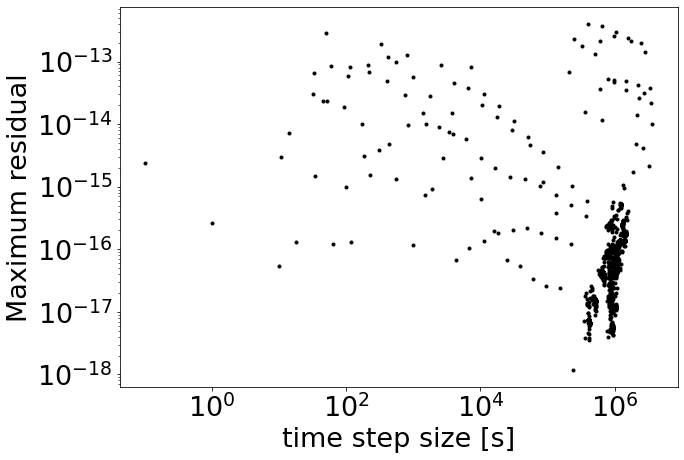

In [14]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(dt_array_LU, F_array_LU,'.k')

plt.xlabel("time step size [s]")
plt.ylabel("Maximum residual")

plt.xscale('log')
plt.yscale('log')

plt.savefig('../results/TANDEMConvergenceAnalysisExtendedODEMaxResidual_Size101.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

In [15]:
print('\\begin{table}')
print('\\begin{tabular}{ | c || c c c | c |}')
print('		\hline')
print('		& Jacobi & Jacobi-GMRES & GS-GMRES & LU \\\\ \\hline\\hline')
print('		Average number of iterations per Newton step & ','%.2f'%np.average(ksp_array_Jacobi),' &    %.2f'%np.average(ksp_array_JacobiGMRES),'  &    %.2f'%np.average(ksp_array_SORGMRES),' & - ', '\\\\')
print('		Average number of Newton steps &','%.2f'%np.average(rhs_array_Jacobi),' &     %.2f'%np.average(rhs_array_JacobiGMRES),'   &   %.2f'%np.average(rhs_array_SORGMRES),' &     %.2f'%np.average(rhs_array_LU), '\\\\')
print('		Total number of timesteps &','%.f'%np.size(rhs_array_Jacobi),' &      %.f'%np.size(rhs_array_JacobiGMRES),'   &    %.f'%np.size(rhs_array_SORGMRES),'   &    %.f'%np.size(rhs_array_LU), '\\\\')
print('		Average final Newton residual &',"  {:.2e}".format(np.average(F_array_Jacobi))," & {:.2e}".format(np.average(F_array_JacobiGMRES))," & {:.2e}".format(np.average(F_array_SORGMRES))," & {:.2e}".format(np.average(F_array_LU)), '\\\\ \\hline')
print('\\end{tabular}')
print('\\caption{Quality of iterative solvers for the Jacobian system on a 5th-order BDF scheme with the 2nd order ODE Formulation on 101 fault elements for 250 years}')
print('\\label{tab:extendedODE_iterativeSolversJacobian}')
print('\\end{table}')


\begin{table}
\begin{tabular}{ | c || c c c | c |}
		\hline
		& Jacobi & Jacobi-GMRES & GS-GMRES & LU \\ \hline\hline
		Average number of iterations per Newton step &  5.41  &    4.95   &    2.57  & -  \\
		Average number of Newton steps & 3.25  &     2.72    &   2.72  &     2.72 \\
		Total number of timesteps & 11504  &      8308    &    8321    &    8306 \\
		Average final Newton residual &   1.91e-07  & 9.03e-16  & 7.85e-16  & 7.41e-16 \\ \hline
\end{tabular}
\caption{Quality of iterative solvers for the Jacobian system on a 5th-order BDF scheme with the 2nd order ODE Formulation on 101 fault elements for 250 years}
\label{tab:extendedODE_iterativeSolversJacobian}
\end{table}
